# UppASD calculation database lookup
This package contains a database of previously-executed runs with UppASD.
Given the input files (`jfile`, `momfile`, `posfile`), the database is searched for matches and a magnetization interpolator is given as output.

In [1]:
from mammos_spindynamics.db import get_M

In [2]:
M = get_M(
    jfile="known_material/jfile",
    momfile="known_material/momfile",
    posfile="known_material/posfile",
)

Found material in database.

Chemical Formula: Co2Fe2H4
Space group name: P6_3/mmc
Space group number: 194
Cell length a: 2.645345
Cell length b: 2.645314
Cell length c: 8.539476
Cell angle alpha: 90.0
Cell angle beta: 90.0
Cell angle gamma: 120.0
Cell volume: 51.751119
ICSD_label: nan
OQMD_label: nan

## What is `M`?

In [3]:
type(M)

scipy.interpolate._interpolate.interp1d

This is the table we have loaded:

In [4]:
import pandas as pd

df = pd.read_csv("../src/mammos_spindynamics/db/data/0001/M.csv")
df

,T[K],M[muB],M^2,M^4,U_Binder,chi,C_v(tot),E,E_exc,E_lsf
0,20,1.619330,2.622230,6.876093e+00,0.666667,0.000091,1.071467,-12.196934,-12.196934,0.0
1,40,1.608173,2.586221,6.688539e+00,0.666667,0.000105,1.031014,-12.069239,-12.069239,0.0
2,60,1.596410,2.548525,6.494983e+00,0.666666,0.000498,1.034504,-11.940920,-11.940920,0.0
3,80,1.584919,2.511968,6.309993e+00,0.666666,0.000634,0.961010,-11.811858,-11.811858,0.0
4,100,1.573813,2.476886,6.134970e+00,0.666667,0.000179,1.092742,-11.681937,-11.681937,0.0
...,...,...,...,...,...,...,...,...,...,...
75,1520,0.009946,0.000117,2.367944e-08,0.423640,0.000705,0.225578,-1.548887,-1.548887,0.0
76,1540,0.009311,0.000102,1.771700e-08,0.437309,0.000605,0.229532,-1.519902,-1.519902,0.0
77,1560,0.009206,0.000100,1.664534e-08,0.445281,0.000578,0.205855,-1.492696,-1.492696,0.0
78,1580,0.009230,0.000100,1.665525e-08,0.449106,0.000569,0.200311,-1.465900,-1.465900,0.0


`M` is the linear interpolating function. We can recover the `x` values with:

In [5]:
M.x

array([  20,   40,   60,   80,  100,  120,  140,  160,  180,  200,  220,
        240,  260,  280,  300,  320,  340,  360,  380,  400,  420,  440,
        460,  480,  500,  520,  540,  560,  580,  600,  620,  640,  660,
        680,  700,  720,  740,  760,  780,  800,  820,  840,  860,  880,
        900,  920,  940,  960,  980, 1000, 1020, 1040, 1060, 1080, 1100,
       1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320,
       1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540,
       1560, 1580, 1600])

and the `y` values with:

In [6]:
M.y

array([1.61933025, 1.60817312, 1.59640977, 1.58491874, 1.57381262,
       1.56226989, 1.55099235, 1.53863502, 1.52674008, 1.51457245,
       1.50216865, 1.48911993, 1.47593062, 1.46277137, 1.45073985,
       1.43623579, 1.42256579, 1.40930466, 1.3962115 , 1.38120701,
       1.36415416, 1.3495301 , 1.33638686, 1.31884309, 1.30201625,
       1.28909309, 1.271116  , 1.2540498 , 1.23736025, 1.22013173,
       1.19943928, 1.18116016, 1.16256002, 1.14006264, 1.12011358,
       1.10038088, 1.07045928, 1.04560189, 1.02357516, 0.99963641,
       0.97032778, 0.94296376, 0.90733855, 0.87046604, 0.83043206,
       0.80123429, 0.75427567, 0.70656895, 0.64974729, 0.58534105,
       0.5071829 , 0.39589071, 0.16228814, 0.06406117, 0.03934674,
       0.03104286, 0.02557987, 0.02234653, 0.01985554, 0.01904184,
       0.01714646, 0.01588455, 0.01504097, 0.01437822, 0.01348454,
       0.0131067 , 0.012521  , 0.01177159, 0.0116398 , 0.01130374,
       0.01080877, 0.01059283, 0.01021372, 0.01019372, 0.00983

Then, we can evaluate it at any other point inside the interval defined by min(`x`) and max(`x`):

In [7]:
M(450)

array(1.34295848)

In [8]:
M(1)  # ValueError

ValueError: A value (1.0) in x_new is below the interpolation range's minimum value (20).

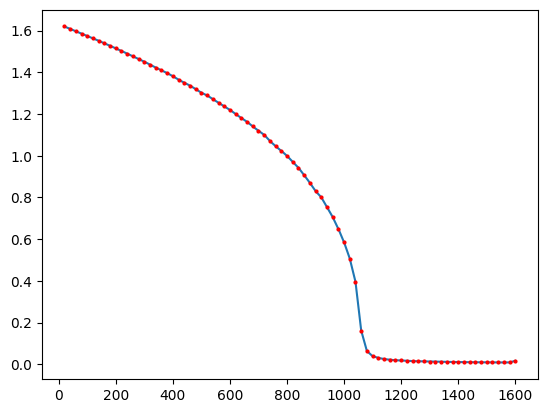

In [9]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.arange(min(M.x), max(M.x), 1)
yy = M(xx)

plt.plot(xx, yy)
plt.plot(M.x, M.y, "o", color="red", markersize=2)

## What if we used quadratic interpolation?
We can specify the interpolation type in the function `get_M`.
The valid options are defined in the [`interp1d` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

Found material in database.

Chemical Formula: Co2Fe2H4
Space group name: P6_3/mmc
Space group number: 194
Cell length a: 2.645345
Cell length b: 2.645314
Cell length c: 8.539476
Cell angle alpha: 90.0
Cell angle beta: 90.0
Cell angle gamma: 120.0
Cell volume: 51.751119
ICSD_label: nan
OQMD_label: nan

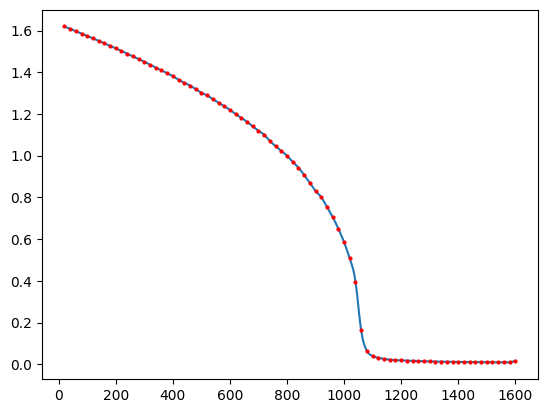

In [10]:
M2 = get_M(
    jfile="known_material/jfile",
    momfile="known_material/momfile",
    posfile="known_material/posfile",
    interpolation_kind="quadratic",
)

yy2 = M2(xx)
plt.plot(xx, yy2)
plt.plot(M2.x, M2.y, "o", color="red", markersize=2)